In [1]:
import pyspedas
import pytplot
from pytplot import tplot, options, tlimit, tplot_names
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import datetime
import netCDF4
from netCDF4 import Dataset, num2date
import datetime as dt

# MagEIS

## Probe (a)

In [2]:
pyspedas.rbsp.mageis(trange=['2015-09-07', '2015-09-08'], probe = 'a' , level='l3', rel='rel04', time_clip = True)

04-May-23 13:45:50: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/ect/mageis/sectors/rel04/2015/
04-May-23 13:45:51: File is current: rbsp_data/rbspa/l3/ect/mageis/sectors/rel04/2015/rbspa_rel04_ect-mageis-l3_20150907_v8.4.0.cdf
04-May-23 13:45:51: C:\Users\sians\anaconda3\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



The lengths of x and y do not match!
LstarVsAlpha_Alpha is currently not in pytplot.
LstarVsAlpha_Alpha is currently not in pytplot.
LstarVsAlpha_Alpha is currently not in pytplot.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip error: No pytplot names were provided.


['FEDU',
 'FEDU_ERROR',
 'FEDU_CORR',
 'FEDU_CORR_ERROR',
 'FPDU',
 'FPDU_pix1',
 'FPDU_pix2',
 'L_star',
 'L',
 'I',
 'B_Calc',
 'B_Eq',
 'MLT',
 'MLAT',
 'Position',
 'LstarVsAlpha',
 'LstarVsAlpha_Alpha']

In [3]:
from pytplot import get_data

data = get_data('FEDU')


In [4]:
data

variable(times=array([1.44158400e+09, 1.44158401e+09, 1.44158402e+09, ...,
       1.44167036e+09, 1.44167037e+09, 1.44167038e+09]), y=array([[[ 42440.25      ,  32172.63867188,  24363.48828125, ...,
                     nan,             nan,             nan],
        [ 51267.18359375,  42913.50390625,  34089.625     , ...,
                     nan,             nan,             nan],
        [ 64748.5859375 ,  54514.75      ,  41836.29296875, ...,
                     nan,             nan,             nan],
        ...,
        [ 64204.484375  ,  57195.8046875 ,  40113.625     , ...,
                     nan,             nan,             nan],
        [ 49989.71875   ,  43399.546875  ,  33961.2265625 , ...,
                     nan,             nan,             nan],
        [ 39175.6171875 ,  33066.32421875,  24117.39453125, ...,
                     nan,             nan,             nan]],

       [[ 41352.0390625 ,  30832.11132812,  25593.96875   , ...,
                     nan,     

In [5]:
time=pytplot.data_quants['FEDU'].coords['time'].values

In [6]:
time_new=[]
for i in range(0,len(time)):
    time_new= np.append(time_new, datetime.datetime.utcfromtimestamp(time[i]))

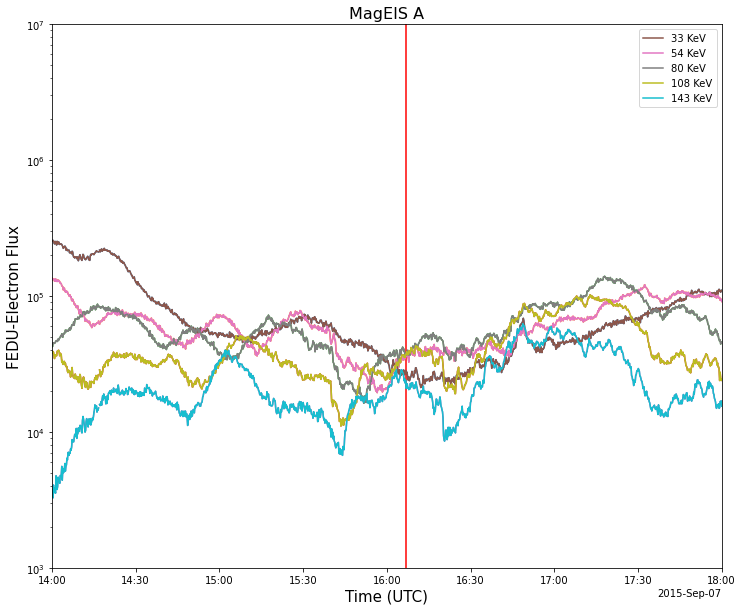

In [28]:
start_date = dt.datetime(2015, 9, 7, 14, 0, 0)
end_date = dt.datetime(2015, 9, 7, 18, 0, 0)
# plt.xlim(start_date, end_date)
# plt.ylim([1e3, 1e7])
# plt.ylim(10^2, 10^6)
line_date = dt.datetime(2015, 9, 7, 16, 7, 0)
# plt.axvline(x= line_date, color='r')

# Create a plot with a single y-axis
fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.semilogy(time_new, data.y[:, 5, 0:5])
ax1.set_xlim(start_date, end_date)
ax1.set_ylim([1e3, 1e7])
ax1.axvline(x= line_date, color='r')

# # Create a second x-axis and plot data on it
# L=pytplot.data_quants['L'].values
# ax2 = ax1.twiny()
# ax2.plot(L)


ax1.set_xlabel('Time (UTC)', fontsize=15)
ax1.set_ylabel('FEDU-Electron Flux', fontsize=15)
ax1.set_title('MagEIS A', fontsize=16)


ax1.plot(time_new,  data.y[:, 5, 0:5], label=['33 KeV', '54 KeV', '80 KeV', '108 KeV', '143 KeV'])


# Add a legend to the plot
ax1.legend()

# plt.semilogy(time_new,data.y[:, 5, 0:5])
# plt.semilogy(time_new,data.y[:, 5, 6:11])
fig.savefig('mageis(a1).jpg')

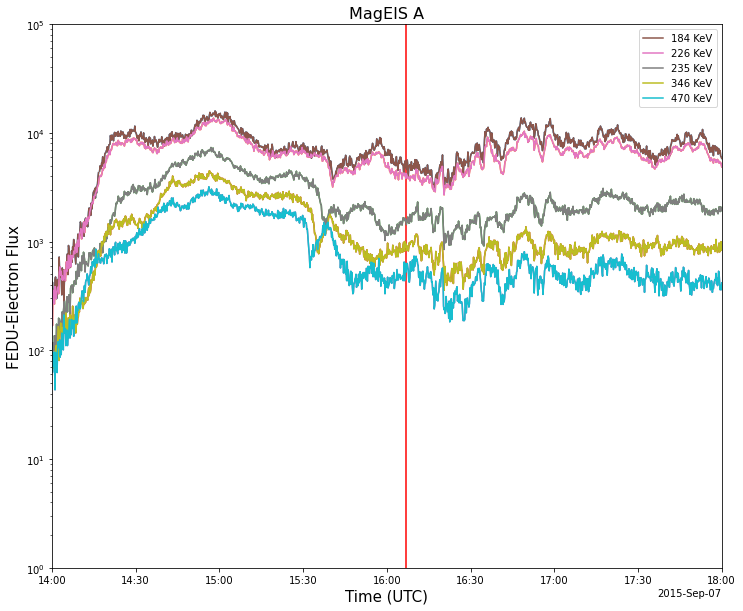

In [29]:
start_date = dt.datetime(2015, 9, 7, 14, 0, 0)
end_date = dt.datetime(2015, 9, 7, 18, 0, 0)
# plt.xlim(start_date, end_date)
# plt.ylim([1e1, 1e5])
# plt.ylim(10^2, 10^6)
line_date = dt.datetime(2015, 9, 7, 16, 7, 0)
# plt.axvline(x= line_date, color='r')

fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.semilogy(time_new, data.y[:, 5, 6:11])
ax1.set_xlim(start_date, end_date)
ax1.set_ylim([1e0, 1e5])
ax1.axvline(x= line_date, color='r')

# # Create a second x-axis and plot data on it
# L=pytplot.data_quants['L'].values
# ax2 = ax1.twiny()
# ax2.plot(L)


ax1.set_xlabel('Time (UTC)', fontsize=15)
ax1.set_ylabel('FEDU-Electron Flux', fontsize=15)
ax1.set_title('MagEIS A', fontsize=16)


ax1.plot(time_new,  data.y[:, 5, 6:11], label=['184 KeV', '226 KeV', '235 KeV', '346 KeV', '470 KeV'])
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='54 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='80 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='108 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='143 KeV')

# Add a legend to the plot
ax1.legend()

# plt.semilogy(time_new,data.y[:, 5, 6:11])
fig.savefig('mageis(a2).jpg')

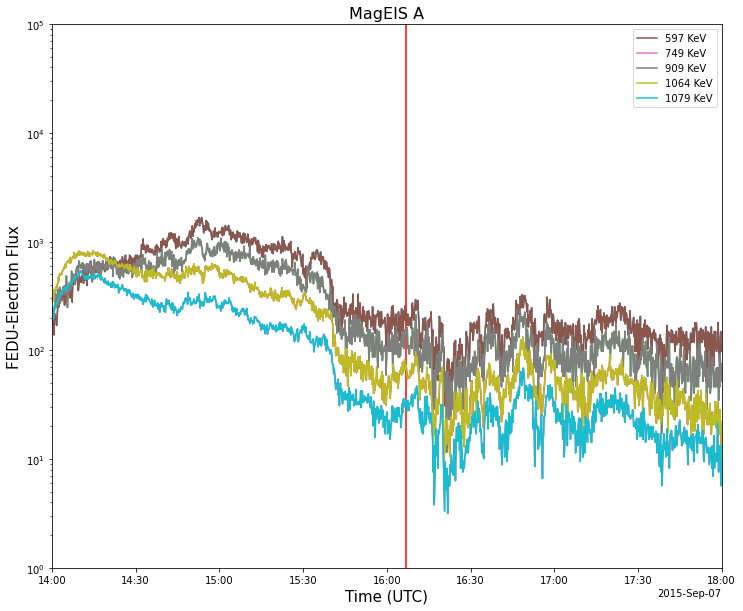

In [30]:
start_date = dt.datetime(2015, 9, 7, 14, 0, 0)
end_date = dt.datetime(2015, 9, 7, 18, 0, 0)
# plt.xlim(start_date, end_date)
# plt.ylim([1e1, 1e5])
# plt.ylim(10^2, 10^6)
line_date = dt.datetime(2015, 9, 7, 16, 7, 0)
# plt.axvline(x= line_date, color='r')

fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.semilogy(time_new, data.y[:, 5, 12:17])
ax1.set_xlim(start_date, end_date)
ax1.set_ylim([1e0, 1e5])
ax1.axvline(x= line_date, color='r')

# # Create a second x-axis and plot data on it
# L=pytplot.data_quants['L'].values
# ax2 = ax1.twiny()
# ax2.plot(L)


ax1.set_xlabel('Time (UTC)', fontsize=15)
ax1.set_ylabel('FEDU-Electron Flux', fontsize=15)
ax1.set_title('MagEIS A', fontsize=16)

ax1.plot(time_new,  data.y[:, 5, 12:17], label=['597 KeV', '749 KeV', '909 KeV', '1064 KeV', '1079 KeV'])
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='54 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='80 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='108 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='143 KeV')

# Add a legend to the plot
ax1.legend()

# plt.semilogy(time_new,data.y[:, 5, 6:11])
fig.savefig('mageis(a3).jpg')

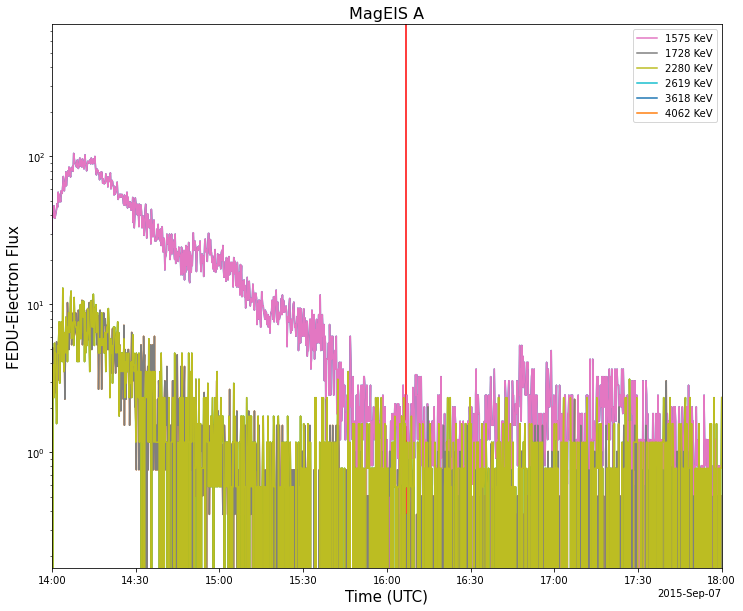

In [31]:
start_date = dt.datetime(2015, 9, 7, 14, 0, 0)
end_date = dt.datetime(2015, 9, 7, 18, 0, 0)
# plt.xlim(start_date, end_date)
# plt.ylim([1e1, 1e5])
# plt.ylim(10^2, 10^6)
line_date = dt.datetime(2015, 9, 7, 16, 7, 0)
# plt.axvline(x= line_date, color='r')

fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.semilogy(time_new, data.y[:, 5, 18:24])
ax1.set_xlim(start_date, end_date)
# ax1.set_ylim([1e0, 1e5])
ax1.axvline(x= line_date, color='r')

# # Create a second x-axis and plot data on it
# L=pytplot.data_quants['L'].values
# ax2 = ax1.twiny()
# ax2.plot(L)


ax1.set_xlabel('Time (UTC)', fontsize=15)
ax1.set_ylabel('FEDU-Electron Flux', fontsize=15)
ax1.set_title('MagEIS A', fontsize=16)


ax1.plot(time_new,  data.y[:, 5, 18:24], label=['1575 KeV', '1728 KeV', '2280 KeV', '2619 KeV', '3618 KeV', '4062 KeV'])

# Add a legend to the plot
ax1.legend()

# plt.semilogy(time_new,data.y[:, 5, 6:11])
fig.savefig('mageis(a4).jpg')

## Probe (b)

In [32]:
pyspedas.rbsp.mageis(trange=['2015-09-07', '2015-09-08'], probe = 'b' , level='l3', rel='rel04', time_clip = True)

04-May-23 14:01:01: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspb/l3/ect/mageis/sectors/rel04/2015/
04-May-23 14:01:02: File is current: rbsp_data/rbspb/l3/ect/mageis/sectors/rel04/2015/rbspb_rel04_ect-mageis-l3_20150907_v8.1.0.cdf


The lengths of x and y do not match!
LstarVsAlpha_Alpha is currently not in pytplot.
LstarVsAlpha_Alpha is currently not in pytplot.
LstarVsAlpha_Alpha is currently not in pytplot.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip error: No pytplot names were provided.


['FEDU',
 'FEDU_ERROR',
 'FEDU_CORR',
 'FEDU_CORR_ERROR',
 'FPDU',
 'FPDU_pix2',
 'L_star',
 'L',
 'I',
 'B_Calc',
 'B_Eq',
 'MLT',
 'MLAT',
 'Position',
 'LstarVsAlpha',
 'LstarVsAlpha_Alpha']

In [33]:
from pytplot import get_data

data_b = get_data('FEDU')


In [34]:
timeb=pytplot.data_quants['FEDU'].coords['time'].values

In [35]:
time_new_b=[]
for i in range(0,len(timeb)):
    time_new_b= np.append(time_new_b, datetime.datetime.utcfromtimestamp(timeb[i]))

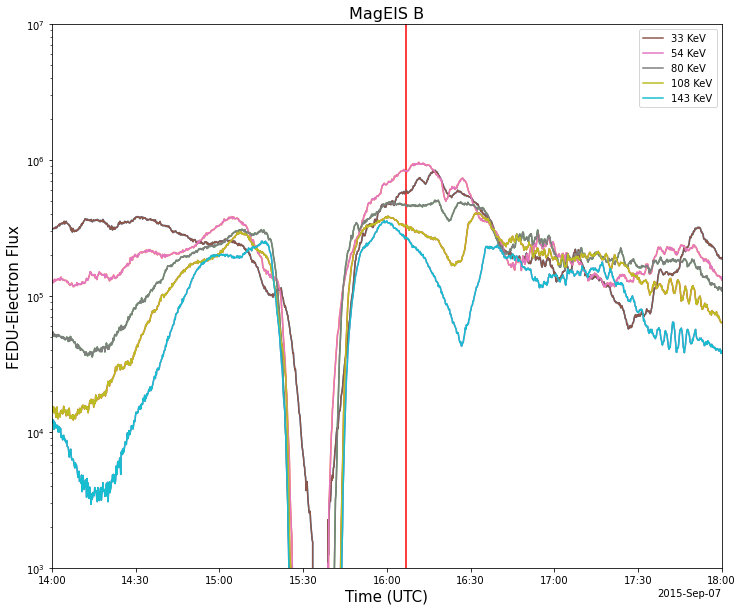

In [36]:
start_date = dt.datetime(2015, 9, 7, 14, 0, 0)
end_date = dt.datetime(2015, 9, 7, 18, 0, 0)
# plt.xlim(start_date, end_date)
# plt.ylim([1e3, 1e7])
# plt.ylim(10^2, 10^6)
line_date = dt.datetime(2015, 9, 7, 16, 7, 0)
# plt.axvline(x= line_date, color='r')

# Create a plot with a single y-axis
fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.semilogy(time_new_b, data_b.y[:, 5, 0:5])
ax1.set_xlim(start_date, end_date)
ax1.set_ylim([1e3, 1e7])
ax1.axvline(x= line_date, color='r')

# # Create a second x-axis and plot data on it
# L=pytplot.data_quants['L'].values
# ax2 = ax1.twiny()
# ax2.plot(L)


ax1.set_xlabel('Time (UTC)', fontsize=15)
ax1.set_ylabel('FEDU-Electron Flux', fontsize=15)
ax1.set_title('MagEIS B', fontsize=16)
ax1.plot(time_new_b,  data_b.y[:, 5, 0:5], label=['33 KeV', '54 KeV', '80 KeV', '108 KeV', '143 KeV'])
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='54 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='80 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='108 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='143 KeV')

# Add a legend to the plot
ax1.legend()
fig.savefig('mageis(b1).jpg')

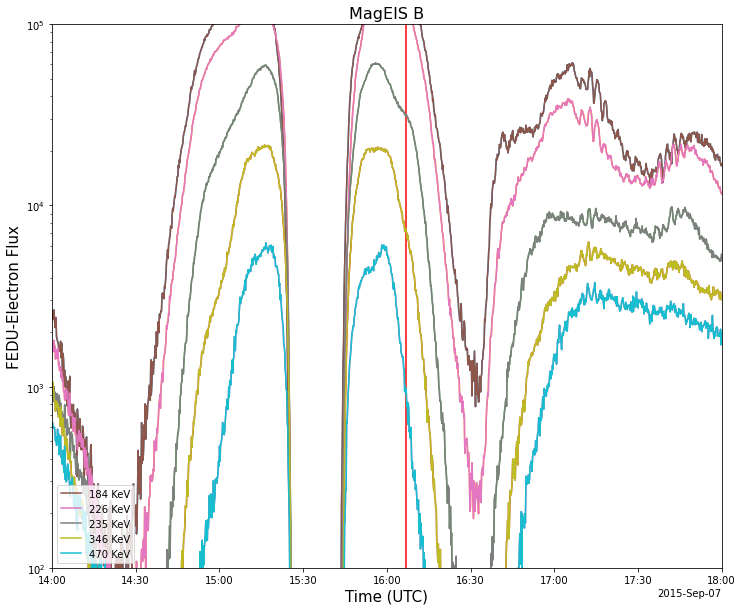

In [37]:
start_date = dt.datetime(2015, 9, 7, 14, 0, 0)
end_date = dt.datetime(2015, 9, 7, 18, 0, 0)
# plt.xlim(start_date, end_date)
# plt.ylim([1e3, 1e7])
# plt.ylim(10^2, 10^6)
line_date = dt.datetime(2015, 9, 7, 16, 7, 0)
# plt.axvline(x= line_date, color='r')

# Create a plot with a single y-axis
fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.semilogy(time_new_b, data_b.y[:, 5, 6:11])
ax1.set_xlim(start_date, end_date)
ax1.set_ylim([1e2, 1e5])
ax1.axvline(x= line_date, color='r')

# # Create a second x-axis and plot data on it
# L=pytplot.data_quants['L'].values
# ax2 = ax1.twiny()
# ax2.plot(L)


ax1.set_xlabel('Time (UTC)', fontsize=15)
ax1.set_ylabel('FEDU-Electron Flux', fontsize=15)
ax1.set_title('MagEIS B', fontsize=16)
ax1.plot(time_new_b,  data_b.y[:, 5, 6:11], label=['184 KeV', '226 KeV', '235 KeV', '346 KeV', '470 KeV'])
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='54 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='80 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='108 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='143 KeV')

# Add a legend to the plot
ax1.legend()
ax1.legend(loc='lower left')
fig.savefig('mageis(b2).jpg')

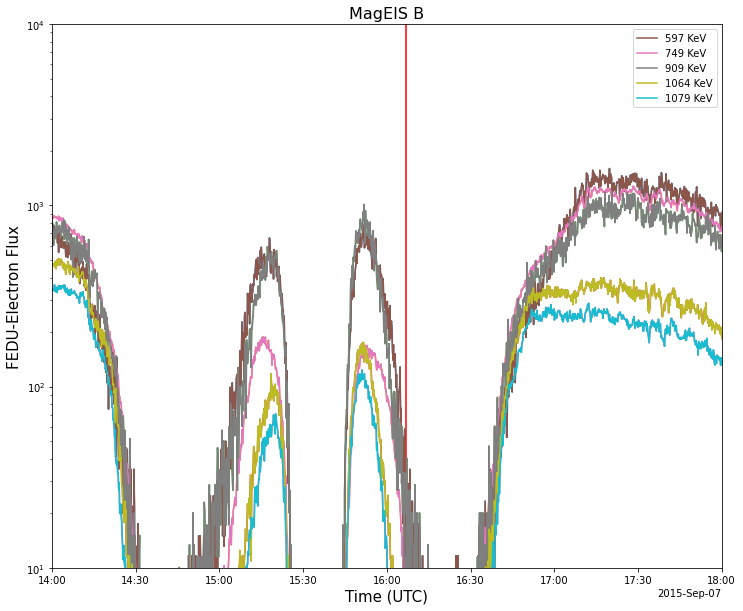

In [38]:
start_date = dt.datetime(2015, 9, 7, 14, 0, 0)
end_date = dt.datetime(2015, 9, 7, 18, 0, 0)
# plt.xlim(start_date, end_date)
# plt.ylim([1e3, 1e7])
# plt.ylim(10^2, 10^6)
line_date = dt.datetime(2015, 9, 7, 16, 7, 0)
# plt.axvline(x= line_date, color='r')

# Create a plot with a single y-axis
fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.semilogy(time_new_b, data_b.y[:, 5, 12:17])
ax1.set_xlim(start_date, end_date)
ax1.set_ylim([1e1, 1e4])
ax1.axvline(x= line_date, color='r')

# # Create a second x-axis and plot data on it
# L=pytplot.data_quants['L'].values
# ax2 = ax1.twiny()
# ax2.plot(L)


ax1.set_xlabel('Time (UTC)', fontsize=15)
ax1.set_ylabel('FEDU-Electron Flux', fontsize=15)
ax1.set_title('MagEIS B', fontsize=16)

ax1.plot(time_new_b,  data_b.y[:, 5, 12:17], label=['597 KeV', '749 KeV', '909 KeV', '1064 KeV', '1079 KeV'])
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='54 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='80 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='108 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='143 KeV')

# Add a legend to the plot
ax1.legend()
fig.savefig('mageis(b3).jpg')

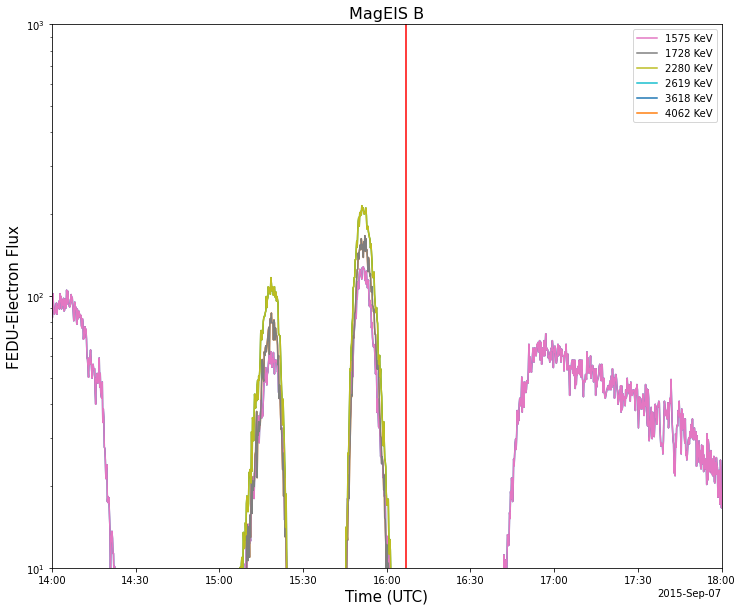

In [39]:
start_date = dt.datetime(2015, 9, 7, 14, 0, 0)
end_date = dt.datetime(2015, 9, 7, 18, 0, 0)
# plt.xlim(start_date, end_date)
# plt.ylim([1e3, 1e7])
# plt.ylim(10^2, 10^6)
line_date = dt.datetime(2015, 9, 7, 16, 7, 0)
# plt.axvline(x= line_date, color='r')

# Create a plot with a single y-axis
fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.semilogy(time_new_b, data_b.y[:, 5, 18:24])
ax1.set_xlim(start_date, end_date)
ax1.set_ylim([1e1, 1e3])
ax1.axvline(x= line_date, color='r')

# # Create a second x-axis and plot data on it
# L=pytplot.data_quants['L'].values
# ax2 = ax1.twiny()
# ax2.plot(L)


ax1.set_xlabel('Time (UTC)', fontsize=15)
ax1.set_ylabel('FEDU-Electron Flux', fontsize=15)
ax1.set_title('MagEIS B', fontsize=16)

ax1.plot(time_new_b,  data_b.y[:, 5, 18:24], label=['1575 KeV', '1728 KeV', '2280 KeV', '2619 KeV', '3618 KeV', '4062 KeV'])
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='54 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='80 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='108 KeV')
# ax1.plot(time_new,  data.y[:, 5, 0:5], label='143 KeV')

# Add a legend to the plot
ax1.legend()
fig.savefig('mageis(b4).jpg')

In [ ]:
ss